# Introduction 

## Predicting penguin species - modelling with binary classification

The data for this activity comes from a study of three different species of Antartic penguin: Adelie, Chinstrap and Gentoo.

In this notebook you will explore which features can be used to predict the species of a penguin.

You will build a model to predict whether a particular penguin is a Gentoo penguin, or not. So this is an example of **binary classification**.

## Importing libraries and data

In [1]:
# import pandas and seaborn
import pandas as pd
import seaborn as sns

# import pyplot fro matplotlib for displaying decision trees
import matplotlib.pyplot as plt

# import modelling functions for decision trees from sklearn
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# the .dropna() function removes any rows with missing data
penguin_data = pd.read_csv('penguins.csv').dropna()
# Display the data to check it imported
penguin_data

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


This data set contains information about penguins observed on the islands of the Palmer Archipelago, Antarctica between 2007 and 2009.

THere are 344 individual records, each representing a single penguin.

Features:
* **Species**: *Adélie, Chinstrap or Gentoo*
* **Island**: *Where the penguin was observed (Biscoe, Dream or Torgersen)*
* **bill_length_mm**: *Bill length (mm)*
* **bill_depth_mm**: *Bill depth (mm)*
* **flipper_length_mm**: *Flipper length (mm)*
* **body_mass_g**: *Body mass (g)*

In [3]:
# Display the data types
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [4]:
# Check how many of each species there are
penguin_data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

# Pre-processing the data

## Adding a binary feature

The code below creates a new feature `Gentoo` that is 1 for all the Gentoo penguins and 0 otherwise.

In [5]:
# Add a binary feature to identify Gentoo penguins
penguin_data['Gentoo'] = penguin_data['species'].replace({'Adelie': 0, 'Chinstrap': 0,'Gentoo': 1})

# Check the data
penguin_data

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Gentoo
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
...,...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


# Exploratory data analysis

You can use `groupby` to see if there are any obvious differences in the measurements for the different species.

In [6]:
all_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

penguin_data.groupby('species')[all_features].mean().round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.82,18.35,190.10,3706.16
Chinstrap,48.83,18.42,195.82,3733.09
Gentoo,47.57,15.00,217.24,5092.44


Gentoo penguins seem to be heavier and have longer flippers than the other species.

KDE plots grouped by species will help compare the distributions.

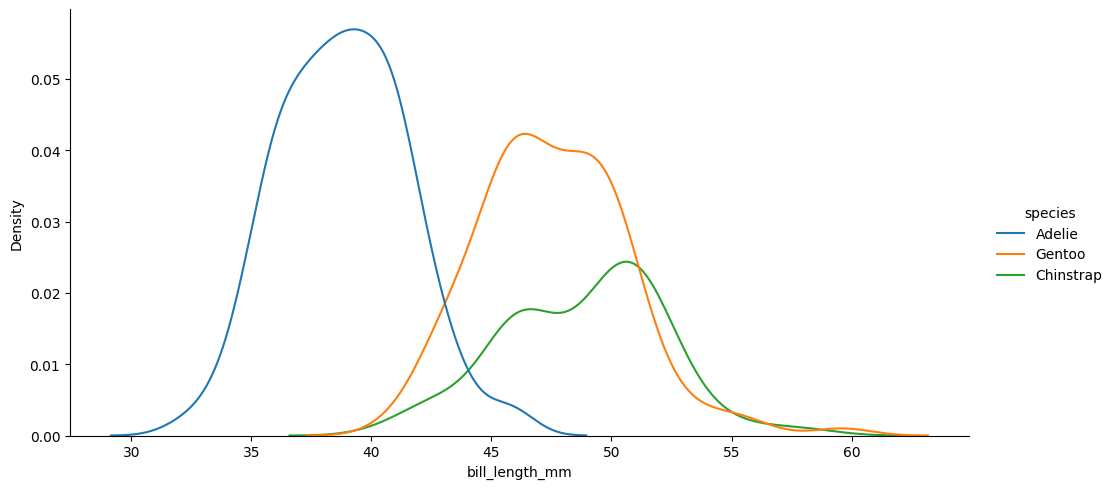

In [7]:
# KDE plot of flipper length grouped by species
sns.displot(data=penguin_data, kind='kde', x='bill_length_mm', hue='species', aspect=2);

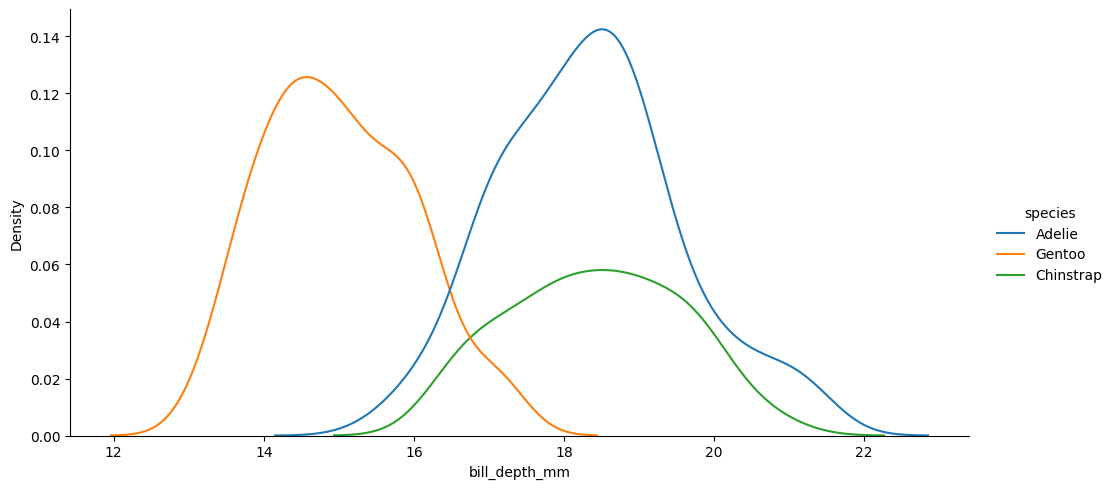

In [8]:
# KDE plot of body mass grouped by species
sns.displot(data=penguin_data, kind='kde', x='bill_depth_mm', hue='species', aspect=2);

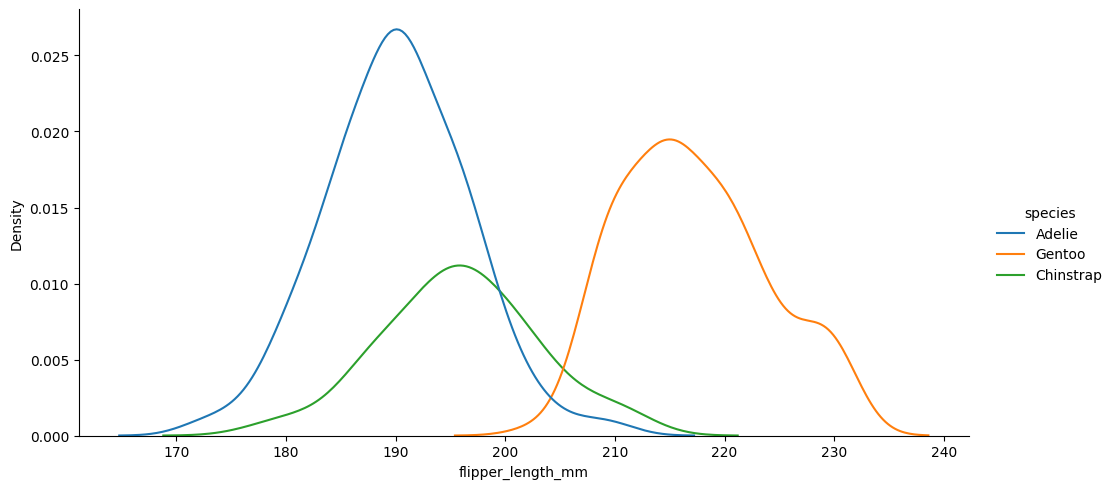

In [9]:
# KDE plot of body mass grouped by species
sns.displot(data=penguin_data, kind='kde', x='flipper_length_mm', hue='species', aspect=2);

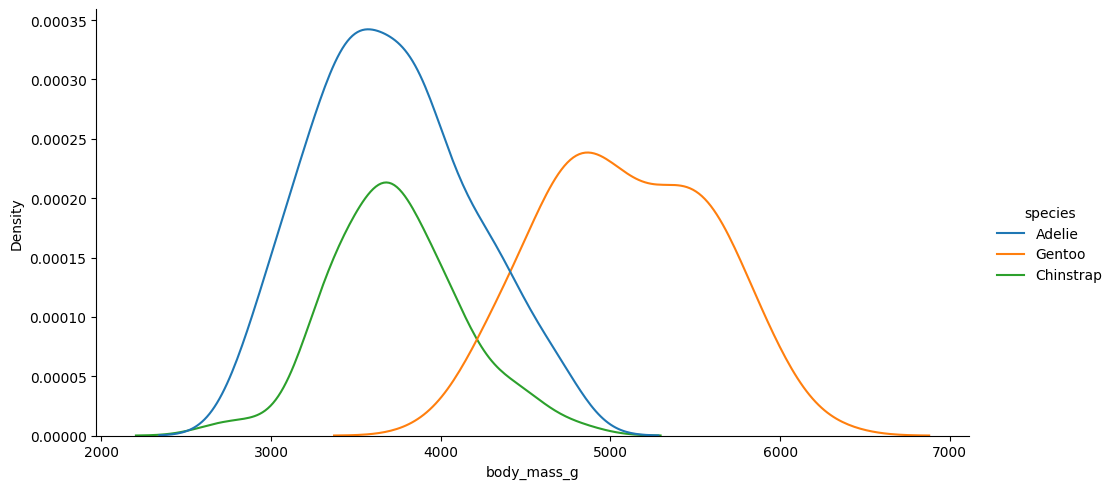

In [10]:
# KDE plot of body mass grouped by species
sns.displot(data=penguin_data, kind='kde', x='body_mass_g', hue='species', aspect=2);

# Building a model

## Performing the training/testing split

Performing the training/testing split is the same process for a binary classification model as it is for a linear regression model.

In [11]:
# create a list for the target and define y
target = 'Gentoo'
y = penguin_data[target]

# create an array of all the input features and define the X
all_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguin_data[all_features]

# perform the training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_train: ",X_train.shape)
print("Length of y_train: ",len(y_train))
print("Size of X_test: ",X_test.shape)
print("Length of y_test: ",len(y_test))

Size of X_train:  (266, 4)
Length of y_train:  266
Size of X_test:  (67, 4)
Length of y_test:  67


## Building a classification model by eye

**You won't need to do this yourself, but it will help to understand what your later models are doing.**

A very simple model, which doesn't use any machine learning, could be:
* if the penguin has a body mass of more than 4000g, then it's a Gentoo penguin;
* otherwise, it's not a Gentoo penguin.

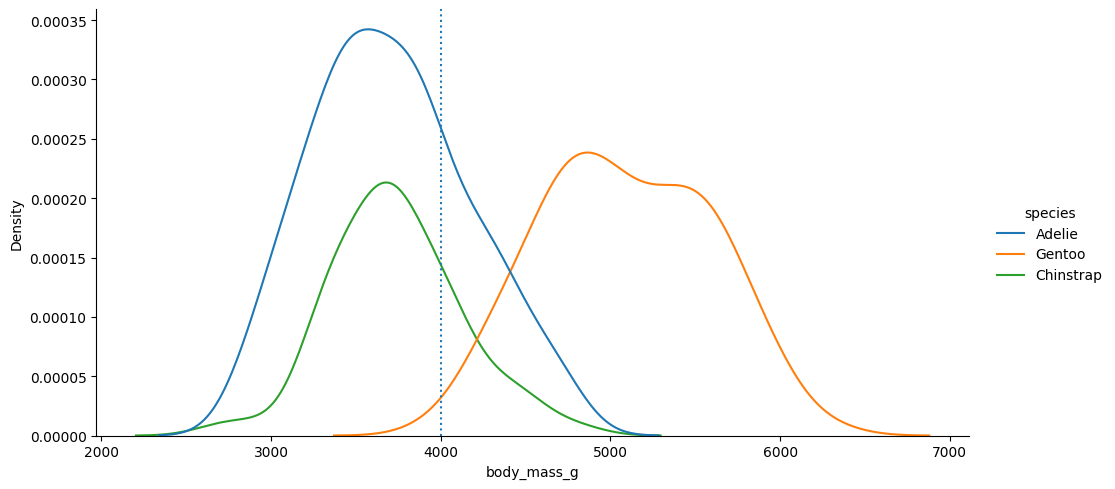

In [12]:
# KDE plot of body mass, grouped by species
fg = sns.displot(data=penguin_data, kind='kde', x='body_mass_g', hue='species', aspect=2)
# Add a vertical dotted line
fg.ax.axvline(4000, ls=':');

You can assess how effective this is as a model by seeing how well it predicts `Gentoo` for the testing data. 

The actual and predicted values can then be compared in a two-way table. This kind of table is often called a *confusion matrix*.

In [13]:
# Create a list of predictions, assuming all penguins with body mass > 4000 are Gentoo
y_pred = (penguin_data['body_mass_g'] > 4000).replace({True: 1, False: 0})

# Display a two-way table of predictions and actual values for the testing data
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted   0   1  All
Actual                
0          31  10   41
1           0  26   26
All        31  36   67


The model predicted 36 of the penguins in the testing data were Gentoo penguins. Of these 26 were identified correctly. This is called the ***precision*** and is usally given as a percentage: $precision = 72.2$%.

There were 26 penguins in the testing set that were Gentoo penguins. This model correctly identified 100% of them. This is called the ***recall*** of the model: $recall = 100$%.

The code in the boxes below shows the percentage calculations.

In [14]:
# calculate the precision
26/36*100

72.22222222222221

In [15]:
# calculate the recall
26/26*100

100.0

> If the threshold were set at 5000g instead of 4000g, what might happen to these percentges?

## Building a model based on `body_mass_g`

You could keep tweaking the threshold by hand until you get a result you're happy with, but this seems like a job for machine learning. 

You can use a _Decision Tree Classifier_ to work out where the best boundary line is.

The code below is similar to the code you've used to build and test linear regression models.
It
* Defines the `input_features`.
* Creates the model using the training data: the model finds the best value of `body_mass_g` to split the data.  
* Displays the decision tree.
* Uses the model to create a list of predictions for the testing data.
* Displays a confusion matrix that compares the predicted species to the actual species.


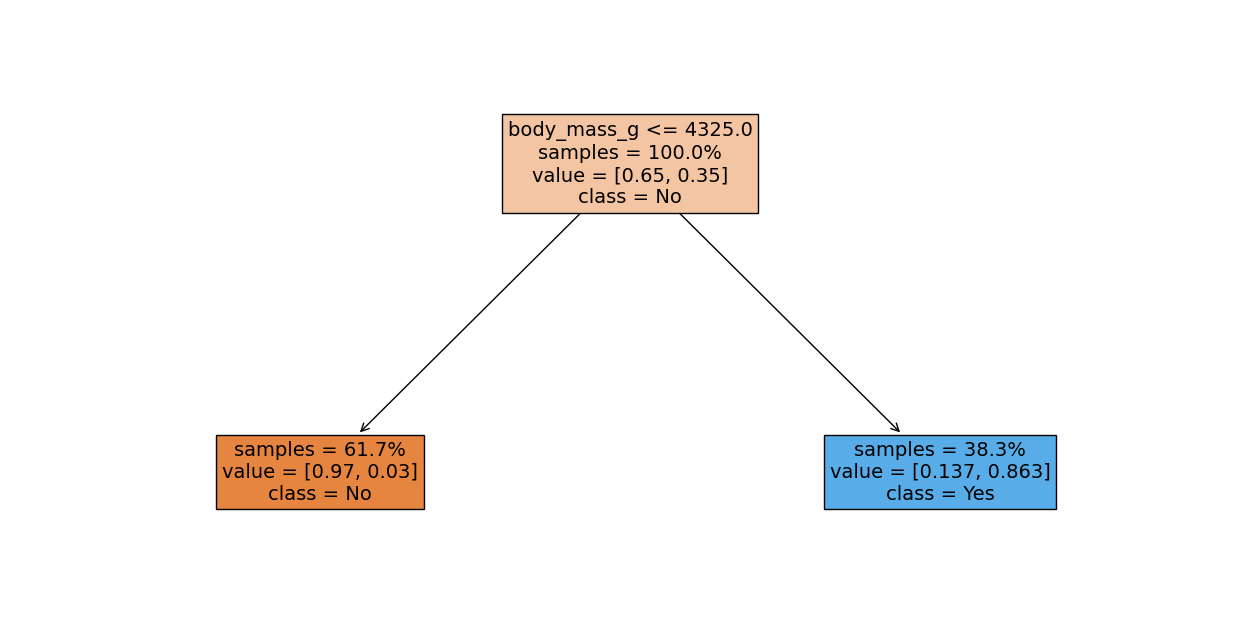

Predicted   0   1  All
Actual                
0          35   6   41
1           2  24   26
All        37  30   67


In [16]:
# define the input features
input_features=['body_mass_g']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(tree_model,  filled=True, impurity=False, proportion=True, feature_names=input_features, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display a two-way-table of predictions and actual value for the testing data
print(pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], margins=True))

In [17]:
# calculate the precision
24/30*100

80.0

In [18]:
# calculate the recall
24/26*100

92.3076923076923

This model predicted 30 of the penguins were Gentoo, of these 24 were correct: $precision = 80$%.

There are 26 Gentoo penguins in the test set. This model correctly identified 24 of these: $recall = 92.3$%.

# Exploration 1

## Building a model based on other features

> Copy and paste code below to build and test a model on `flipper_length_mm`. 
>
> Use the confusion matrix to calculate the precision and recall of your model.

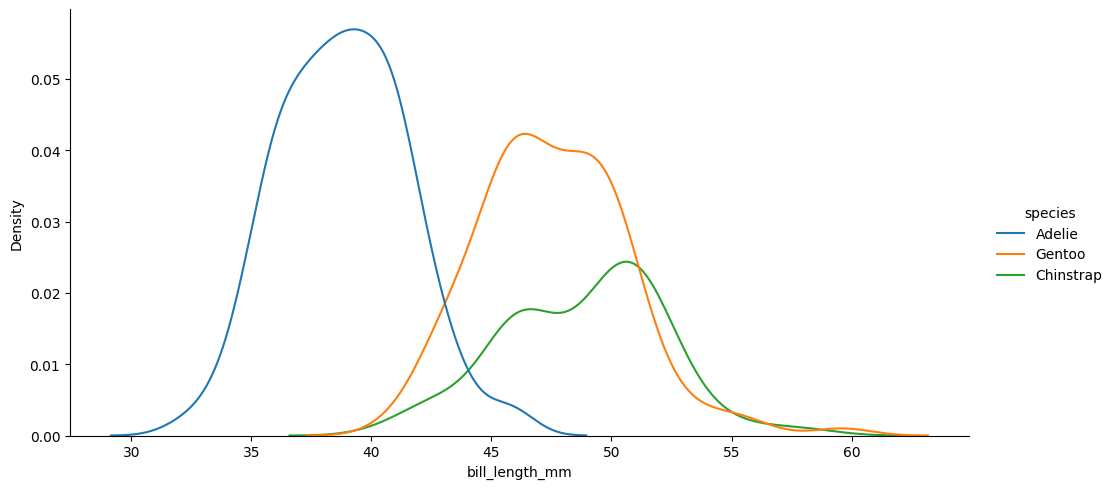

In [19]:
# KDE plot of flipper length grouped by species
sns.displot(data=penguin_data, kind='kde', x='bill_length_mm', hue='species', aspect=2);

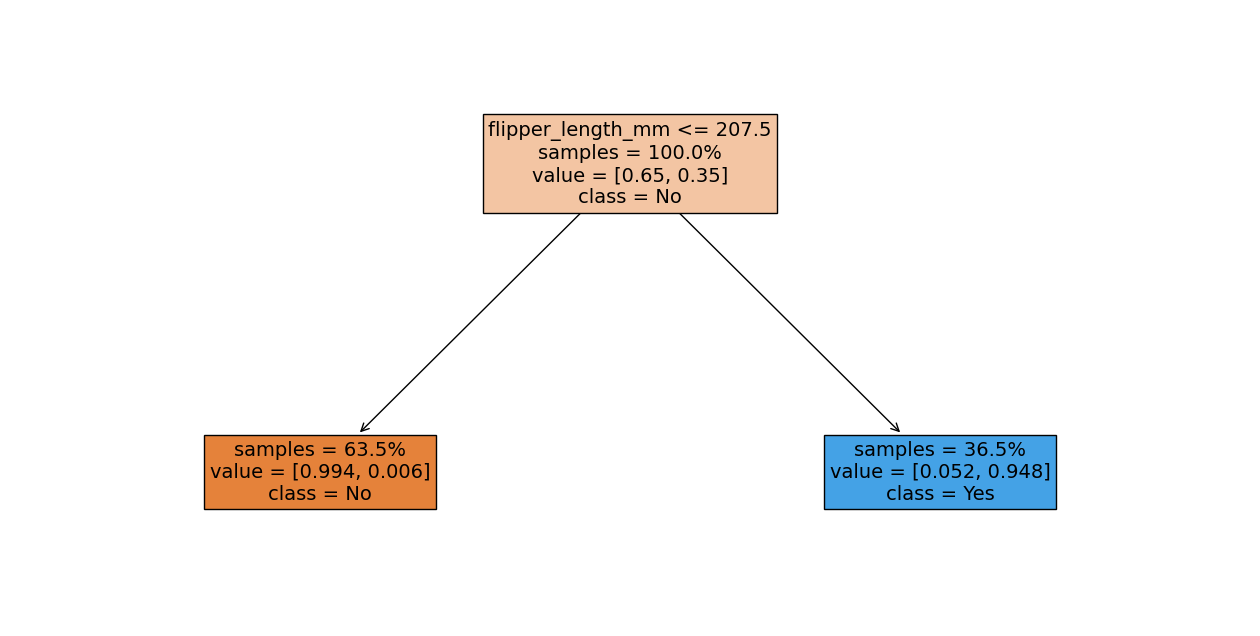

Predicted   0   1  All
Actual                
0          40   1   41
1           1  25   26
All        41  26   67


In [20]:
# Build a model based on flipper length
# define the input features
input_features=['flipper_length_mm']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(tree_model,  filled=True, impurity=False, proportion=True, feature_names=input_features, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display a two-way-table of predictions and actual value for the testing data
print(pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], margins=True))

In [21]:
# calculate the precision
25/26*100

96.15384615384616

In [22]:
# calculate the recall
25/26*100

96.15384615384616

You should find that this model splits at a flipper length of 207.5mm has a precision of 95% and a recall of 95%.

> In the cells below build some models based on other features.

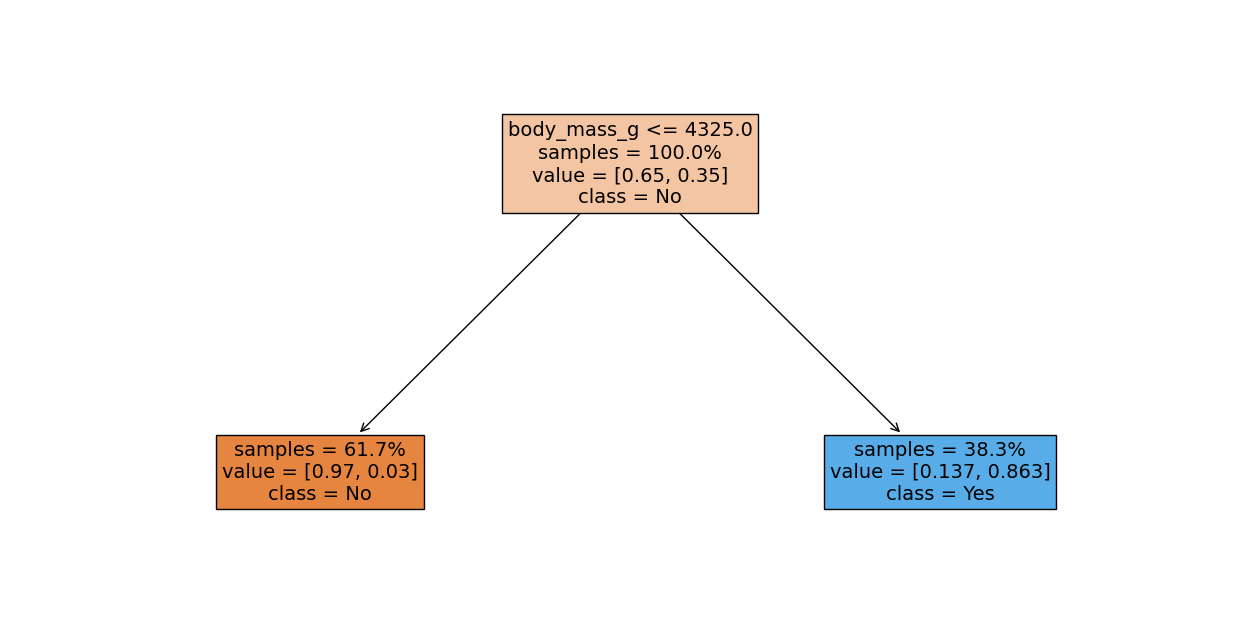

Predicted   0   1  All
Actual                
0          35   6   41
1           2  24   26
All        37  30   67


In [23]:
# Build a model based on another feature
# Build a model based on flipper length
# define the input features
input_features=['body_mass_g']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(tree_model,  filled=True, impurity=False, proportion=True, feature_names=input_features, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display a two-way-table of predictions and actual value for the testing data
print(pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], margins=True))

In [24]:
# calculate the precision

In [25]:
# calculate the recall

In [26]:
# Build a model based on another feature

In [27]:
# calculate the precision

In [28]:
# calculate the recall

# Building a model based on two input features

Just as you did with your regression models, you can give more than one input feature. You'll need to increase the `max_depth` of your tree from 1 to 2.

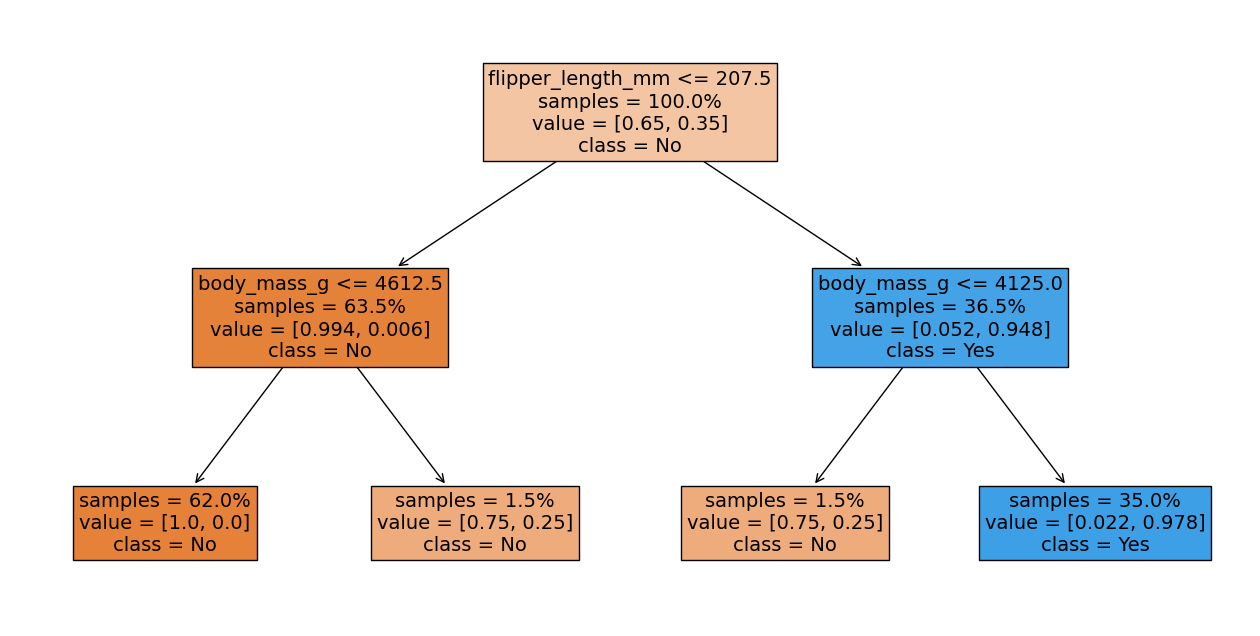

Predicted   0   1  All
Actual                
0          40   1   41
1           1  25   26
All        41  26   67


In [29]:
# Define the input features
input_features=['body_mass_g', 'flipper_length_mm']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(tree_model,  filled=True, impurity=False, proportion=True, feature_names=input_features, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# Create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display a two-way-table of predictions and actual value for the testing data
print(pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"], margins=True))

In [30]:
# calculate the precision
25/26*100

96.15384615384616

In [31]:
# calculate the recall
25/26*100

96.15384615384616

This model has a precision of 95.5% and a recall of 95.5%.

## Building other models based multiple features

> In the code boxes below build some other models based on more than one feature.

# Exploration 2

The code below creates a binary feature for Adelie penguins.

In [32]:
# Add a binary feature to identify Adelie penguins
penguin_data['Adelie'] = penguin_data['species'].replace({'Adelie': 1, 'Chinstrap': 0,'Gentoo': 0})

## Performing a new training-testing split

You will need to perform a new training-testing split. The code in the box below does this. Note that the 4 objects: `X_adelie_train`, `X_adelie_test`, `y_adelie_train` and  `y_adelie_test` have got new names to distinguish them from the original training testing split.

**Giving new names to the training and testing sets is important if you change the data you are working on, e.g. if you take a slice of the data.**

In [33]:
# create a list for the target and define y
target = 'Adelie'
y = penguin_data[target]

# create an array of all the input features and define the X
all_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguin_data[all_features]

# perform the training-testing split
X_adelie_train, X_adelie_test, y_adelie_train, y_adelie_test = train_test_split(X, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_adelie_train: ",X_adelie_train.shape)
print("Length of y_adelie_train: ",len(y_adelie_train))
print("Size of X_adelie_test: ",X_adelie_test.shape)
print("Length of y_adelie_test: ",len(y_adelie_test))

Size of X_adelie_train:  (266, 4)
Length of y_adelie_train:  266
Size of X_adelie_test:  (67, 4)
Length of y_adelie_test:  67


## Building a model for Adelie penguins

> Use the `groupby` from earlier to choose features that might distinguish Adelie penguins.
>
> Then copy and paste code below to 
> * Build decision tree models using one or two of those features
> * Evaluate your models
>
> **Note that you will need to changes all the instances to `X_adelie_train`, `X_adelie_test`, `y_adelie_train` and `y_adelie_test` in your code block for building the model.**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=340619e8-6d0b-4d94-b387-415eb023bba4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>